In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
from matplotlib import cm
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [5]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [6]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [7]:
X=df.iloc[:,2:4]
y=df.iloc[:,-1]

In [8]:
X.head()

,Volume,Weight
0,1000,790
1,1200,1160
2,1000,929
3,900,865
4,1500,1140


In [9]:
y.head()

0     99
1     95
2     95
3     90
4    105
Name: CO2, dtype: int64

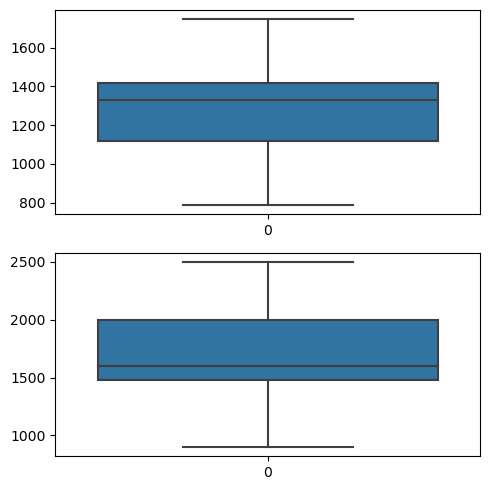

In [10]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(X['Weight'], ax = axs[0])
plt2 = sns.boxplot(X['Volume'], ax = axs[1])
plt.tight_layout()


C:\Users\Alina\AppData\Local\Temp\ipykernel_17316\2334567932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CO2'])


<AxesSubplot:xlabel='CO2', ylabel='Density'>

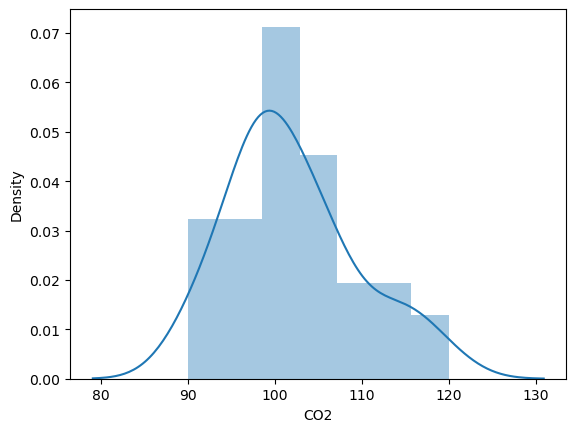

In [11]:
sns.distplot(df['CO2'])

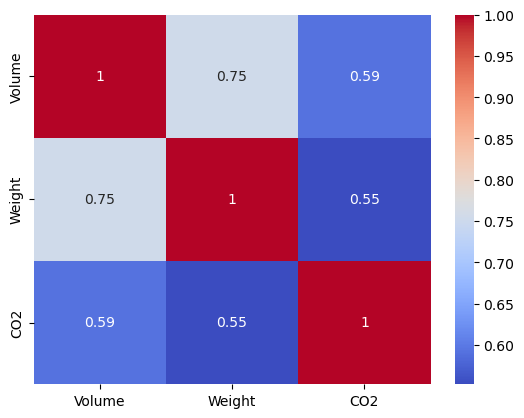

In [12]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [14]:
model = LinearRegression()
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.901980901636316
Mean Square Error: 63.39765310998794
Root Mean Square Error: 7.96226432053018


In [16]:
# Generate a grid of points for visualization
x1_vals = np.linspace(X_train['Weight'].min(), X_train['Weight'].max(), 10)
x2_vals = np.linspace(X_train['Volume'].min(), X_train['Volume'].max(), 10)
x1_vals, x2_vals = np.meshgrid(x1_vals, x2_vals)


In [17]:
# Predict the target variable for the grid of points
X_pred = np.column_stack((x1_vals.flatten(), x2_vals.flatten()))
y_pred = model.predict(X_pred)
y_pred = y_pred.reshape(x1_vals.shape)

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


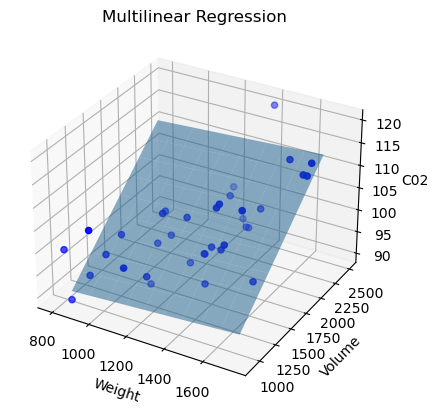

In [19]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X['Weight'], X['Volume'], y, c='b', marker='o')

# Plot the regression plane
ax.plot_surface(x1_vals, x2_vals, y_pred, alpha=0.5)

# Set labels and title
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('C02')
ax.set_title('Multilinear Regression')

# Show the plot
plt.show()